In [105]:
#Importing the data and storing it in variable df_all

import pandas as pd
from sklearn.model_selection import train_test_split
df_all = pd.read_csv("crox-early-data.csv")

df_all = df_all.dropna()

df_train, df_test = train_test_split(df_all, test_size=0.3, random_state=1)
X_train = df_train.drop(columns=['Close Higher'])
y_train = df_train['Close Higher']

X_test = df_test.drop(columns=['Close Higher'])
y_test = df_test['Close Higher']

X_train.head()

,Date,Open,Close,Google Trends,Previous GT,Volume,TTM EPS,TTM PE
54,2/1/2024,103.04,100.81,46,41.0,1759214,12.10,8.33
19,3/22/2024,139.54,141.62,54,54.0,1111254,12.03,11.77
31,3/6/2024,123.50,120.39,48,54.0,689700,12.03,10.01
58,1/26/2024,102.45,102.96,35,35.0,1639558,12.10,8.51
17,3/26/2024,142.14,140.05,51,48.0,1023328,12.03,11.64


In [106]:
df_all.groupby("Close Higher").mean(numeric_only=True)

,Open,Close,Google Trends,Previous GT,Volume,TTM EPS,TTM PE
Close Higher,,,,,,,
0,122.017931,120.197931,45.620690,45.793103,1.201881e+06,12.054138,9.973793
1,120.213030,122.064848,45.424242,44.636364,1.317298e+06,12.053333,10.129394


In [108]:
#Choosing features
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

cols = ["Previous GT", "TTM PE"]

LR.fit(X_train[cols], y_train)
LR.score(X_train[cols], y_train)
LR.coef_[0]

array([-0.01149866,  0.06556216])

In [109]:
def linear_score(w, x0, x1):
    return w[0]*x0 + w[1]*x1

In [110]:
#Predict makes binary predictions for data using a supplied score function with weights w and a supplied threshold. Taken from lecture notes from week 2.
#We begin with a 0 threshold but later on test others to find an optimal threshold

t = 0

def predict(score_fun, w, threshold, df):
    """
    make binary predictions for data df using a supplied score function with weights w and supplied threshold. 
    """
    scores = score_fun(w, df["Previous GT"], df["TTM PE"])
    return 1*(scores > threshold)

df_train["decision"] = predict(linear_score, LR.coef_[0], t, df_all)
(df_train["decision"] == df_train["Close Higher"]).mean()

0.5348837209302325

(-100.0, 0.5348837209302325)

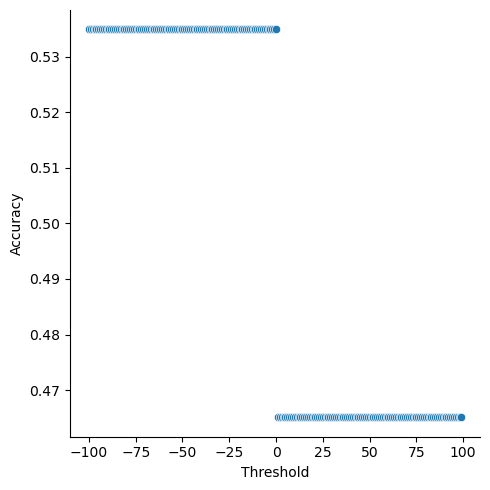

In [111]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


iterations = 200
predictions = []
for i in range(iterations):
    threshold = (-iterations/2)+(i)
    df_train["decision"] = predict(linear_score, LR.coef_[0], threshold, df_train)
    predictions.append((threshold, (df_train["decision"] == df_train["Close Higher"]).mean()))


predictions_df = pd.DataFrame(data=predictions)
predictions_df.columns =['Threshold', 'Accuracy']

sns.relplot(data=predictions_df, x="Threshold", y="Accuracy")

t = predictions_df['Threshold'][predictions_df['Accuracy'].idxmax()]

predictions_df['Threshold'][predictions_df['Accuracy'].idxmax()], predictions_df['Accuracy'].max()


In [112]:
df_test["decision"] = predict(linear_score, LR.coef_[0], t, df_test)
(df_test["decision"] == df_test["Close Higher"]).mean()

0.5263157894736842